# Main characters network analysis

In [22]:
#This script creates a weighted network for the 6 main characters in Friends.
#The network is based on the characters appearance in a scene. 
#If two charactars appears in the same scene, an edge is created.
#The script also includes an analyse of the network.
#Lasse P. S. Hansen 11-12-2019

import pandas as pd
import csv
import requests
import re
import numpy
#import nltk
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import urllib
import statistics as st
import operator
import collections
from operator import truediv

## Network

In [2]:
df = pd.read_csv('C:/Users/lass_/Desktop/Socialgrafer/project_v2/All_Friends_data.csv')
df=df.drop(columns='Unnamed: 0')

#A list of all unique episodes, seperated by seasons.
l=list(np.unique(df.Episode))
seasons = []
seasons.append(l[9:10]+l[18:41])
seasons.append(l[41:64])
seasons.append(l[64:89])
seasons.append(l[89:112])
seasons.append(l[112:135])
seasons.append(l[135:158])
seasons.append(l[158:181])
seasons.append(l[181:204])
seasons.append(l[204:227])
seasons.append(l[0:9]+l[10:18])

In [3]:
AllEpisodes = []
for season in seasons:
    for Episode in season:
        AllEpisodes.append(Episode)

C:\Users\lass_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\lass_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\lass_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


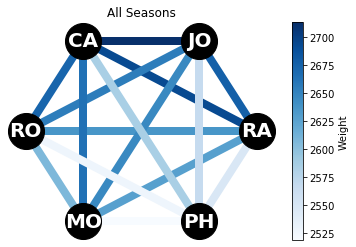

<Figure size 3600x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
#Creates a network for all seasons.
char = ['rachel','joey','chandler','ross','monica','phoebe']
pos=nx.circular_layout(['RA','JO','CA','RO','MO','PH'],center=None)
G = nx.Graph()

#Creates a dataframe for all episodes in the season.
seasonDF=df[df['Episode'].isin(AllEpisodes)]

#Finds all the unique scenes.
scenes=list(np.unique(seasonDF.Scene.astype(str)))

for i in scenes:
    #Finds all the speaker in the scene.
    tempscene=list(np.unique(seasonDF[seasonDF.Scene == i].Speaker))

    for c1 in char:
        for c2 in char:
            if (c1 != c2):

                #Checks if the two characters are in the scene and add an edge (or increases the weight)
                if (c1 and c2 in tempscene):
                    if G.has_edge(c1,c2):
                        w = G[c1][c2]['weight']
                        G.add_edge(c1,c2,weight = w + 1)    
                    else:
                        G.add_edge(c1,c2,weight = 1)

#Borring ploting stuff..
mapping = {'rachel': 'RA','joey': 'JO','chandler': 'CA','ross': 'RO','monica': 'MO','phoebe': 'PH'}
G = nx.relabel_nodes(G, mapping)

W=nx.get_edge_attributes(G,'weight')
S=list(W.values())

edges=nx.draw_networkx_edges(G, pos, width=8, alpha=1, edge_color=S, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G, pos, node_size=1300,node_color='black',labels=True)
nx.draw_networkx_labels(G,pos=pos,font_color='white',font_weight='bold',font_size=20)


plt.axis('off')
plt.title(label='All Seasons')
plt.colorbar(edges,label='Weight')
plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/main_network_all.png',dpi=200,transparent=True)
plt.figure(figsize=(50,20))
plt.show()
plt.clf()

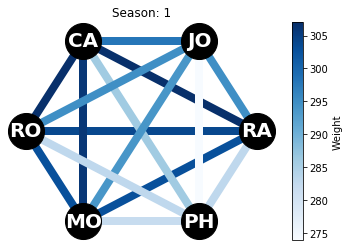

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 294.6666666666667
The highest weight is: 307 from ('RA', 'CA')
number of scenes: 288


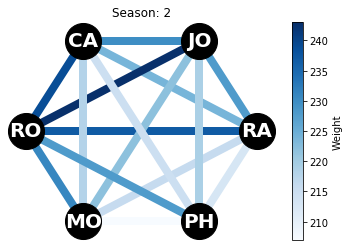

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 224.66666666666666
The highest weight is: 243 from ('JO', 'RO')
number of scenes: 256


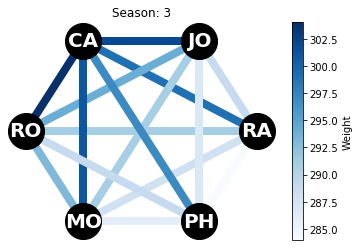

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 293
The highest weight is: 304 from ('CA', 'RO')
number of scenes: 327


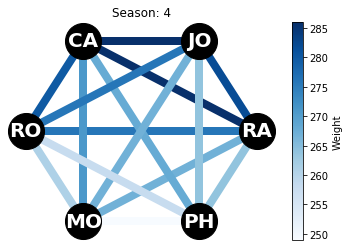

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 270.3333333333333
The highest weight is: 286 from ('RA', 'CA')
number of scenes: 289


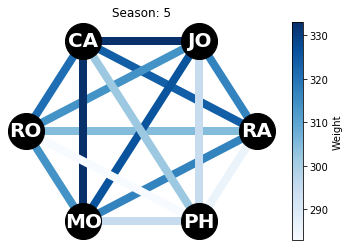

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 311
The highest weight is: 333 from ('JO', 'CA')
number of scenes: 306


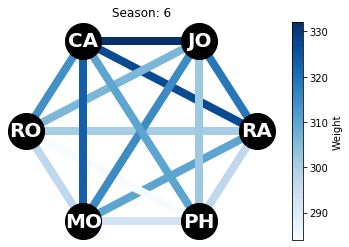

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 308.6666666666667
The highest weight is: 332 from ('JO', 'CA')
number of scenes: 343


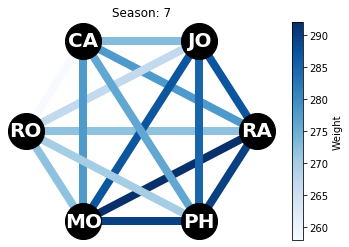

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 278.3333333333333
The highest weight is: 292 from ('RA', 'MO')
number of scenes: 317


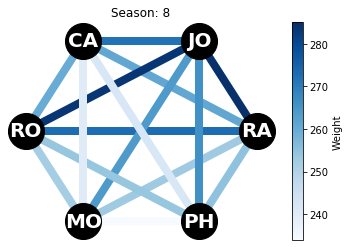

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 259.6666666666667
The highest weight is: 285 from ('RA', 'JO')
number of scenes: 304


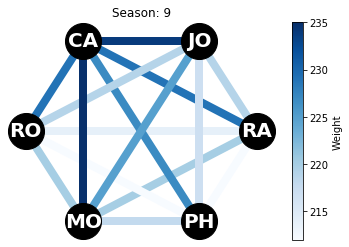

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 222
The highest weight is: 235 from ('CA', 'MO')
number of scenes: 272


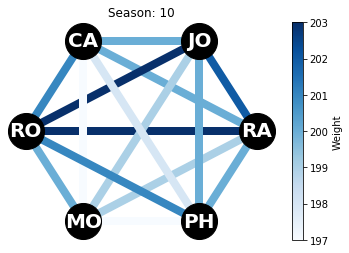

<Figure size 3600x1440 with 0 Axes>

The mean of the weight is: 200
The highest weight is: 203 from ('RA', 'RO')
number of scenes: 214


<Figure size 432x288 with 0 Axes>

In [5]:
#Creates a network for each Season.
k = 0
Wsum = {}
NmScenes = []
char = ['rachel','joey','chandler','ross','monica','phoebe']

pos=nx.circular_layout(['RA','JO','CA','RO','MO','PH'],center=None)

for season in seasons:
    
    k = k + 1
    SeasonName = ('Season: '+str(k))
    
    G = nx.Graph()

    #Creates a dataframe for all episodes in the season.
    seasonDF=df[df['Episode'].isin(season)]
    
    
    #Finds all the unique scenes.
    scenes=list(np.unique(seasonDF.Scene.astype(str)))
    
    for i in scenes:
        #Finds all the speaker in the scene.
        tempscene=list(np.unique(seasonDF[seasonDF.Scene == i].Speaker))

        for c1 in char:
            for c2 in char:
                if (c1 != c2):
                    
                    #Checks if the two characters are in the scene and add an edge (or increases the weight)
                    if (c1 and c2 in tempscene):
                        if G.has_edge(c1,c2):
                            w = G[c1][c2]['weight']
                            G.add_edge(c1,c2,weight = w + 1)    
                        else:
                            G.add_edge(c1,c2,weight = 1)
    
    #Borring ploting stuff..
    mapping = {'rachel': 'RA','joey': 'JO','chandler': 'CA','ross': 'RO','monica': 'MO','phoebe': 'PH'}
    G = nx.relabel_nodes(G, mapping)

    W=nx.get_edge_attributes(G,'weight')
    S=list(W.values())

    edges=nx.draw_networkx_edges(G, pos, width=8, alpha=1, edge_color=S, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_nodes(G, pos, node_size=1300,node_color='black',labels=True)
    nx.draw_networkx_labels(G,pos=pos,font_color='white',font_weight='bold',font_size=20)

    
    PicPath = 'C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/Network_Main_Char_Season_'+str(k)+'.png'
    
    plt.axis('off')
    plt.title(label=SeasonName)
    plt.colorbar(edges,label='Weight')
    plt.savefig(PicPath, format="PNG",dpi=200,transparent=True)
    plt.figure(figsize=(50,20))
    plt.show()
    plt.clf()

    WH=max(W, key=W.get)
    
    print('The mean of the weight is: ' + str(st.mean(S)))
    print('The highest weight is: ' + str(max(S)) + ' from ' + str(WH))    
    print('number of scenes: ' + str(len(scenes)))
    
    NmScenes.append(len(scenes))
    
    
    for con in [*W]:
        val = W[con]
        
        #The 'nx.get_node_attribute' make the order diffrent for each iteration.. 
        conName = list(con)
        conName.sort()
        
        Wsum.setdefault(str(conName),[]).append(val)

## Plots

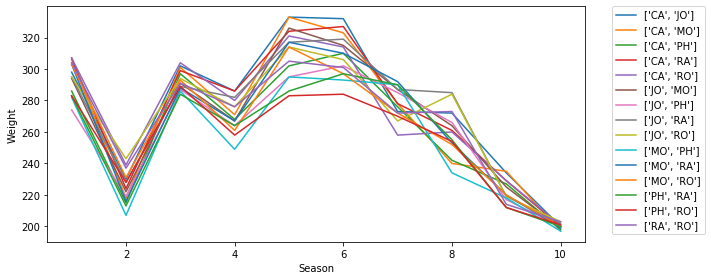

In [6]:
Wsum=dict(collections.OrderedDict(sorted(Wsum.items())))
plt.figure(figsize=[10,4])
for i in [*Wsum]:
    
    c1=Wsum[i]
    c2=list(range(1, 11))
    plt.plot(c2,c1, label = i)
    

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Weight')
plt.xlabel('Season')
plt.tight_layout()

In [7]:
#Creates a dictionary with the weight relative to the number of scenes for each season and for each edge.
WsumRelative = {}
for i in [*Wsum]:
    
    c1=Wsum[i]
    c1=[x/2 for x in c1]
    c1=list(map(truediv, c1, NmScenes))
    WsumRelative[i]=c1

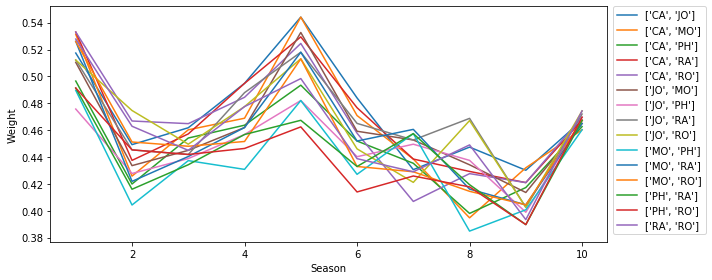

In [8]:
#Plots the weight
plt.figure(figsize=[10,4])
for i in [*WsumRelative]:
    
    c1=WsumRelative[i]
    c2=list(range(1, 11))
    plt.plot(c2,c1, label = i)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Weight')
plt.xlabel('Season')
plt.tight_layout()

plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/All_main_char.png', format="PNG",dpi=200,transparent=True)

In [9]:
#Finds the highest weight.
for i in [*WsumRelative]:
    
    c1=WsumRelative[i]
    print(str(i) + ': ' + str(max(c1)))

['CA', 'JO']: 0.5441176470588235
['CA', 'MO']: 0.5441176470588235
['CA', 'PH']: 0.4965277777777778
['CA', 'RA']: 0.5329861111111112
['CA', 'RO']: 0.5329861111111112
['JO', 'MO']: 0.5326797385620915
['JO', 'PH']: 0.4820261437908497
['JO', 'RA']: 0.5179738562091504
['JO', 'RO']: 0.5130718954248366
['MO', 'PH']: 0.4895833333333333
['MO', 'RA']: 0.5260416666666666
['MO', 'RO']: 0.5260416666666666
['PH', 'RA']: 0.4913194444444444
['PH', 'RO']: 0.4913194444444444
['RA', 'RO']: 0.5277777777777778


In [10]:
#Finds the sum of each weight.
WeightSumList = []
for u in range(10): 
    temp = []
    for i in list(WsumRelative.keys()):
        temp.append(WsumRelative[i][u])
    WeightSumList.append(sum(temp))

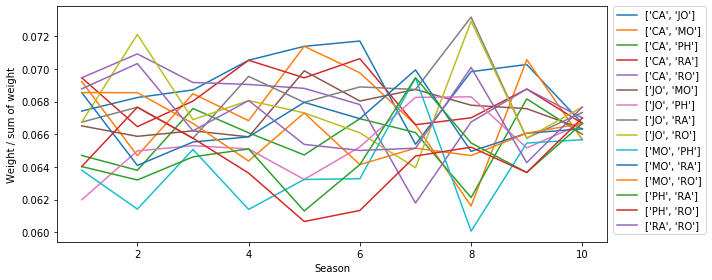

In [15]:
#plots the weight relative to the sum of the weights
plt.figure(figsize=[10,4])
for i in [*WsumRelative]:
    c1=WsumRelative[i]
    c1=list(map(truediv, c1, WeightSumList))
    c2=list(range(1, 11))
    plt.plot(c2,c1, label = i)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Weight / sum of weight')
plt.xlabel('Season')
plt.tight_layout()
plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/Weight_Relative.png', format="PNG",dpi=200,transparent=True)

## Ross and Rachel

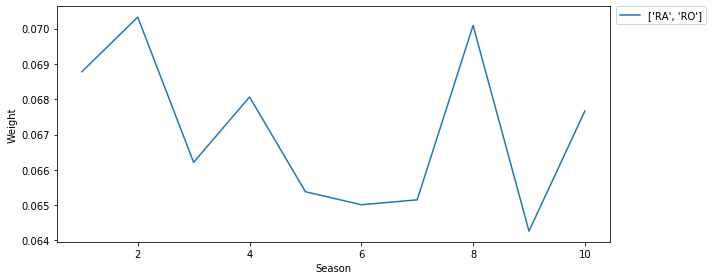

In [21]:
#Plots the weight of the edge between ross and rachel.
plt.figure(figsize=[10,4])
for i in [*WsumRelative][14:15]:
    
    c1=WsumRelative[i]
    c1=list(map(truediv, c1, WeightSumList))
    c2=list(range(1, 11))
    plt.plot(c2,c1, label = i)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Weight')
plt.xlabel('Season')
plt.tight_layout()
plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/ross_rachel.png', format="PNG",dpi=200,transparent=True)

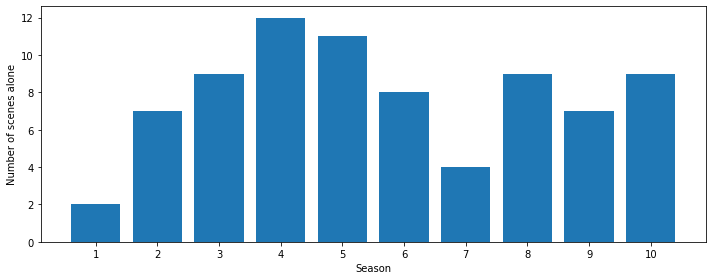

In [13]:
#Finds the number of times Ross and Rachel are alone together in a scene.
RoRa = []
k = 0
for season in seasons:
    
    kk = 0
    k = k + 1
    SeasonName = ('Season: '+str(k))

    #Creates a dataframe for all episodes in the season.
    seasonDF=df[df['Episode'].isin(season)]
    
    
    #Finds all the unique scenes.
    scenes=list(np.unique(seasonDF.Scene.astype(str)))
    
    for i in scenes:
        #Finds all the speakers in the scene.
        tempscene=list(np.unique(seasonDF[seasonDF.Scene == i].Speaker))
        
        # if there are only two speakers and if the two speakers are ross and rachel.
        if (len(tempscene) == 2):
            if ('rachel' in tempscene and 'ross' in tempscene):
                kk = kk + 1
    RoRa.append(kk)

plt.figure(figsize=[10,4])
plt.bar(list(range(1,11)),RoRa)
plt.ylabel('Number of scenes alone')
plt.xlabel('Season')
plt.xticks(list(range(1,11)),list(range(1,11)))
plt.tight_layout()
plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/ross_rach_alone.png', format="PNG",dpi=200,transparent=True)

## Monica and Chandler

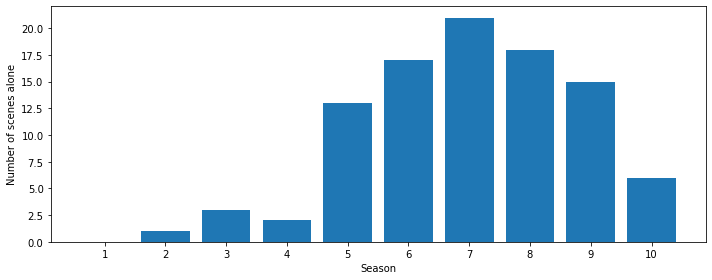

In [17]:
#Finds the number of times Monica and Chandler are alone together in a scene.
MoCa = []
k = 0
for season in seasons:
    
    kk = 0
    k = k + 1
    SeasonName = ('Season: '+str(k))

    #Creates a dataframe for all episodes in the season.
    seasonDF=df[df['Episode'].isin(season)]
    
    
    #Finds all the unique scenes.
    scenes=list(np.unique(seasonDF.Scene.astype(str)))
    
    for i in scenes:
        #Finds all the speakers in the scene.
        tempscene=list(np.unique(seasonDF[seasonDF.Scene == i].Speaker))
        
        # if there are only two speakers and if the two speakers are ross and rachel.
        if (len(tempscene) == 2):
            if ('monica' in tempscene and 'chandler' in tempscene):
                kk = kk + 1
    MoCa.append(kk)

plt.figure(figsize=[10,4])
plt.bar(list(range(1,11)),MoCa)
plt.ylabel('Number of scenes alone')
plt.xlabel('Season')
plt.xticks(list(range(1,11)),list(range(1,11)))
plt.tight_layout()
plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/chandler_monica_alone.png', format="PNG",dpi=200,transparent=True)

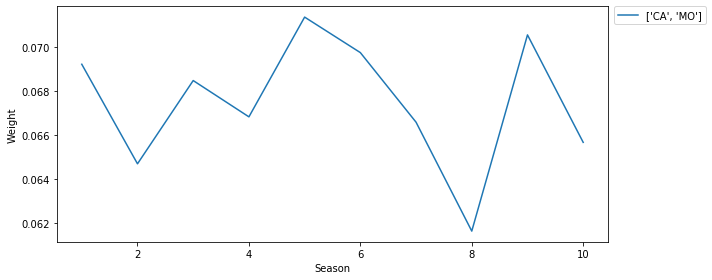

In [20]:
#Plots the weight of the edge between Monica and Chandler.
plt.figure(figsize=[10,4])
for i in [*WsumRelative][1:2]:
    
    c1=WsumRelative[i]
    c1=list(map(truediv, c1, WeightSumList))
    c2=list(range(1, 11))
    plt.plot(c2,c1, label = i)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Weight')
plt.xlabel('Season')
plt.tight_layout()
plt.savefig('C:/Users/lass_/Desktop/Socialgrafer/project_v2/GIFS/ross_rachel.png', format="PNG",dpi=200,transparent=True)